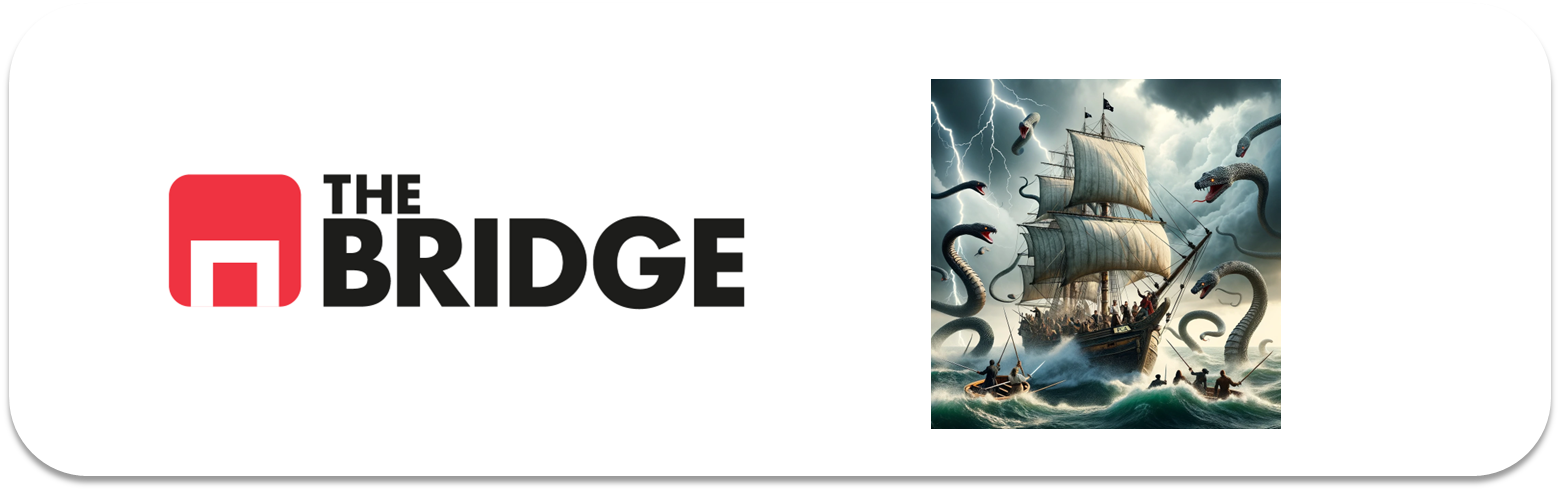

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:

import pandas as pd  # Para trabajar con datos tabulares
import numpy as np   # Para cálculos numéricos
import matplotlib.pyplot as plt  # Para visualización de datos
import seaborn as sns  # Para hacer gráficos más bonitos
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler  # Para escalar los datos
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif  # Métodos de selección de features
from sklearn.ensemble import RandomForestClassifier  # Modelo base para selección de features
from sklearn.feature_selection import RFE, SelectFromModel  # Métodos de selección
from sklearn.metrics import classification_report, accuracy_score  # Para evaluar modelos


### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [2]:
# Cargar el dataset
file_path = "./data/credit_npo.csv"  
df = pd.read_csv(file_path)  # Leer el archivo CSV y guardarlo en un DataFrame

# Mostrar las primeras 5 filas del dataset
print("Primeras 5 filas del dataset:")
print(df.head())  # Ver las primeras filas


Primeras 5 filas del dataset:
   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0                 0                              0.081892   37   
1                 0                              0.023413   74   
2                 0                              0.000000   43   
3                 0                              0.492754   44   
4                 0                              1.000000   63   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     0   0.070709         5656.0   
1                                     0   0.209197         4870.0   
2                                     0   0.080784         5000.0   
3                                     0   0.412735         7333.0   
4                                     0   0.000000         8333.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               12                        1   
1                               

In [7]:
# Mostrar información general del dataset
print("\nInformación del dataset:")
print(df.info())  

# Ver si hay valores nulos en el dataset
print("\nValores nulos por columna:")
print(df.isnull().sum())  


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  fl

In [3]:
# Ver cuántos valores nulos tiene cada columna
print("\nValores nulos por columna antes de eliminar:")
print(df.isnull().sum())

# Eliminar filas con valores nulos
df_clean = df.dropna()

# Verificar que se eliminaron los valores nulos
print("\nValores nulos por columna después de eliminar:")
print(df_clean.isnull().sum())

# Mostrar
print("\nNúmero de filas antes de eliminar nulos:", len(df))
print("Número de filas después de eliminar nulos:", len(df_clean))


Valores nulos por columna antes de eliminar:
SeriousDlqin2yrs                          0
RevolvingUtilizationOfUnsecuredLines      0
age                                       0
NumberOfTime30-59DaysPastDueNotWorse      0
DebtRatio                                 0
MonthlyIncome                           721
NumberOfOpenCreditLinesAndLoans           0
NumberOfTimes90DaysLate                   0
NumberRealEstateLoansOrLines              0
NumberOfTime60-89DaysPastDueNotWorse      0
NumberOfDependents                      177
dtype: int64

Valores nulos por columna después de eliminar:
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNot

In [4]:
# Mostrar los valores únicos de las columnas que contienen "NumberOf"
for col in df_clean.columns:
    if "NumberOf" in col:
        print(f"\nValores únicos en {col}:")
        print(df_clean[col].value_counts().sort_index())



Valores únicos en NumberOfTime30-59DaysPastDueNotWorse:
NumberOfTime30-59DaysPastDueNotWorse
0     9818
1     1354
2      397
3      127
4       64
5       23
6       20
7        1
8        2
98      10
Name: count, dtype: int64

Valores únicos en NumberOfOpenCreditLinesAndLoans:
NumberOfOpenCreditLinesAndLoans
0      112
1      307
2      445
3      638
4      848
5      963
6     1031
7     1110
8     1009
9      965
10     765
11     719
12     574
13     454
14     365
15     338
16     236
17     216
18     151
19     129
20     118
21      62
22      61
23      39
24      38
25      30
26      19
27      16
28      13
29      10
30      10
31       7
32       3
33       4
34       2
35       2
36       1
38       1
40       1
41       1
43       1
48       1
49       1
Name: count, dtype: int64

Valores únicos en NumberOfTimes90DaysLate:
NumberOfTimes90DaysLate
0     11156
1       394
2       142
3        54
4        31
5        14
6         6
7         3
8         3
9         1

<Figure size 1200x800 with 0 Axes>

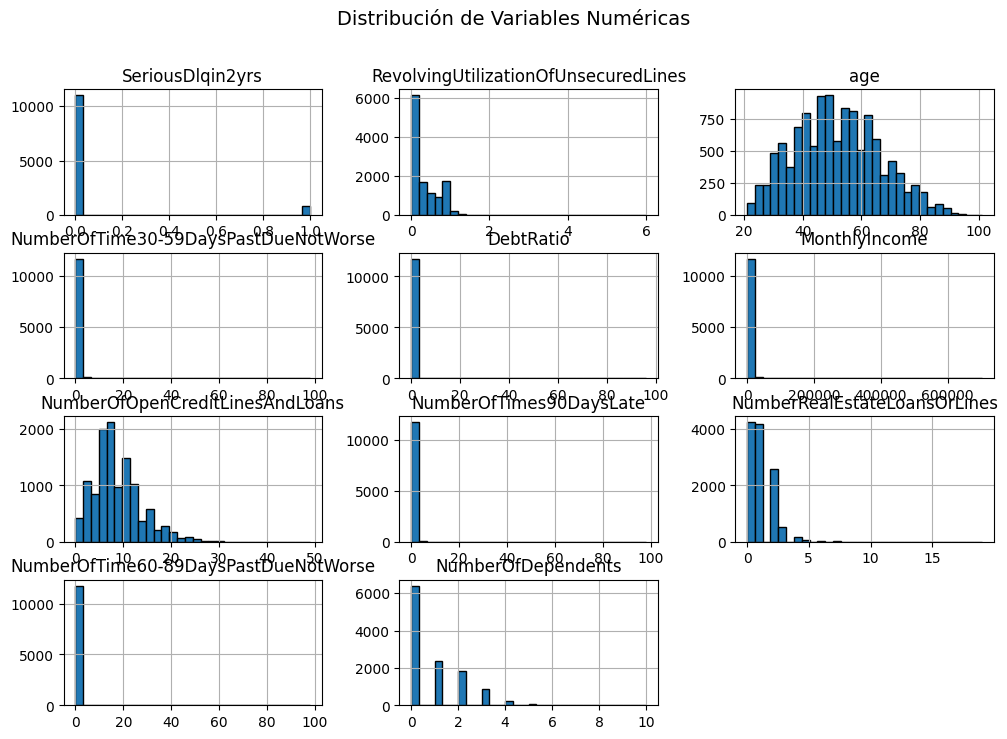

In [5]:
# Seleccionar columnas numéricas
numeric_features = df_clean.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Graficar histogramas de las variables numéricas
plt.figure(figsize=(12, 8))
df_clean[numeric_features].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribución de Variables Numéricas", fontsize=14)
plt.show()


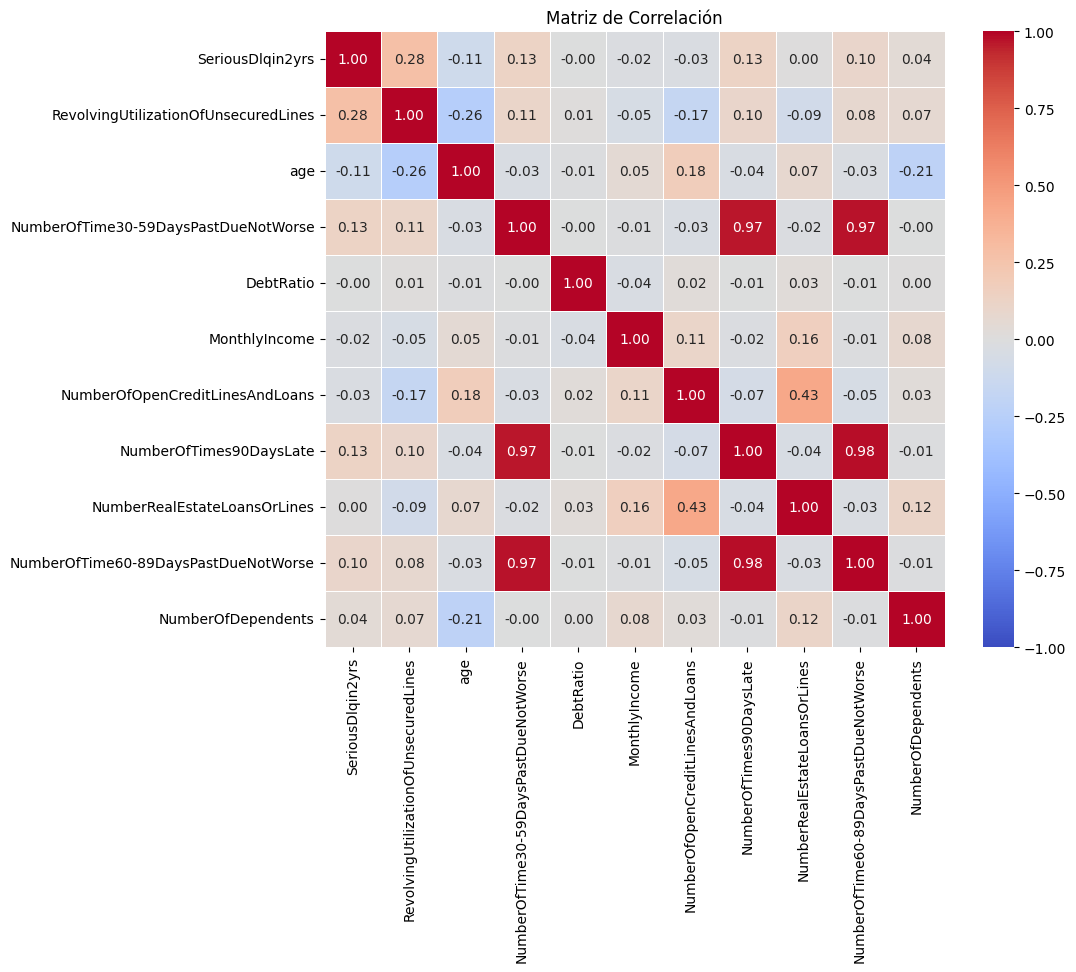

In [6]:
# Calcular la matriz de correlación
correlation_matrix = df_clean.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()

In [7]:
# Convertir NumberOfTime30-59DaysPastDueNotWorse en categorías
df_clean['NumberOfTime30-59DaysPastDueNotWorse'] = pd.cut(df_clean['NumberOfTime30-59DaysPastDueNotWorse'],
    bins=[-1, 0, 2, float('inf')], labels=['Nunca', 'Ocasional', 'Frecuente'])

# Convertir NumberOfTimes90DaysLate en categorías
df_clean['NumberOfTimes90DaysLate'] = pd.cut(df_clean['NumberOfTimes90DaysLate'],
    bins=[-1, 0, 2, float('inf')], labels=['Nunca', 'Ocasional', 'Frecuente'])

# Convertir NumberOfTime60-89DaysPastDueNotWorse en categorías
df_clean['NumberOfTime60-89DaysPastDueNotWorse'] = pd.cut(df_clean['NumberOfTime60-89DaysPastDueNotWorse'],
    bins=[-1, 0, 1, float('inf')], labels=['Nunca', 'Ocasional', 'Frecuente'])

# Convertir NumberOfOpenCreditLinesAndLoans en categorías
df_clean['NumberOfOpenCreditLinesAndLoans'] = pd.cut(df_clean['NumberOfOpenCreditLinesAndLoans'],
    bins=[-1, 5, 15, float('inf')], labels=['Pocas', 'Moderadas', 'Muchas'])

# Convertir NumberOfDependents en categorías
df_clean['NumberOfDependents'] = pd.cut(df_clean['NumberOfDependents'],
    bins=[-1, 0, 2, float('inf')], labels=['Sin dependientes', 'Pocos dependientes', 'Varios dependientes'])


C:\Users\migue\AppData\Local\Temp\ipykernel_58240\908488980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['NumberOfTime30-59DaysPastDueNotWorse'] = pd.cut(df_clean['NumberOfTime30-59DaysPastDueNotWorse'],
C:\Users\migue\AppData\Local\Temp\ipykernel_58240\908488980.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['NumberOfTimes90DaysLate'] = pd.cut(df_clean['NumberOfTimes90DaysLate'],
C:\Users\migue\AppData\Local\Temp\ipykernel_58240\908488980.py:10: SettingWithCopyWarning: 
A valu

In [8]:
# Lista de columnas categorizadas
categorical_columns = [
    'NumberOfTime30-59DaysPastDueNotWorse',
    'NumberOfTimes90DaysLate',
    'NumberOfTime60-89DaysPastDueNotWorse',
    'NumberOfOpenCreditLinesAndLoans',
    'NumberOfDependents'
]

# Mostrar la cantidad de valores por categoría en cada columna
for col in categorical_columns:
    print(f"\nDistribución de categorías en {col}:")
    print(df_clean[col].value_counts())




Distribución de categorías en NumberOfTime30-59DaysPastDueNotWorse:
NumberOfTime30-59DaysPastDueNotWorse
Nunca        9818
Ocasional    1751
Frecuente     247
Name: count, dtype: int64

Distribución de categorías en NumberOfTimes90DaysLate:
NumberOfTimes90DaysLate
Nunca        11156
Ocasional      536
Frecuente      124
Name: count, dtype: int64

Distribución de categorías en NumberOfTime60-89DaysPastDueNotWorse:
NumberOfTime60-89DaysPastDueNotWorse
Nunca        11206
Ocasional      478
Frecuente      132
Name: count, dtype: int64

Distribución de categorías en NumberOfOpenCreditLinesAndLoans:
NumberOfOpenCreditLinesAndLoans
Moderadas    7330
Pocas        3313
Muchas       1173
Name: count, dtype: int64

Distribución de categorías en NumberOfDependents:
NumberOfDependents
Sin dependientes       6413
Pocos dependientes     4182
Varios dependientes    1221
Name: count, dtype: int64


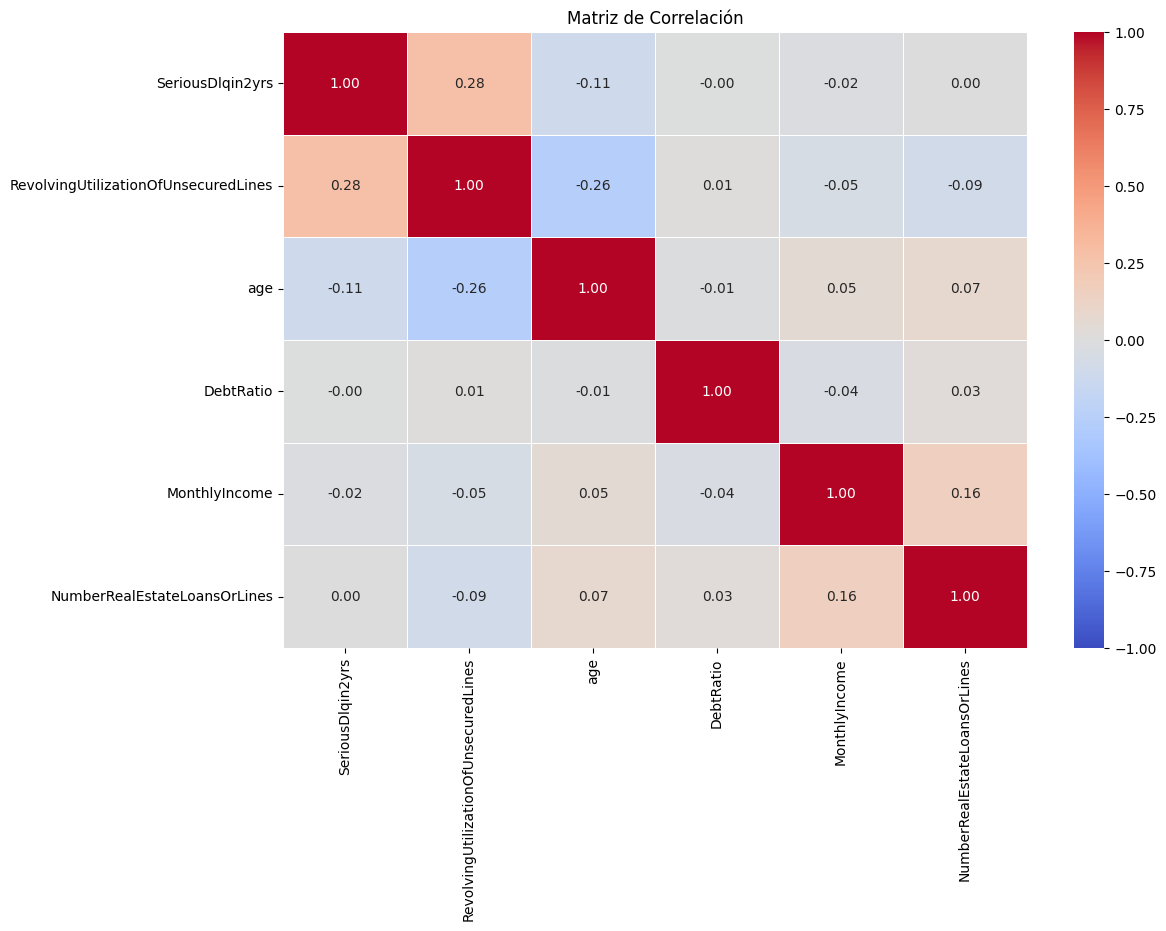


Variables eliminadas por alta correlación:
set()


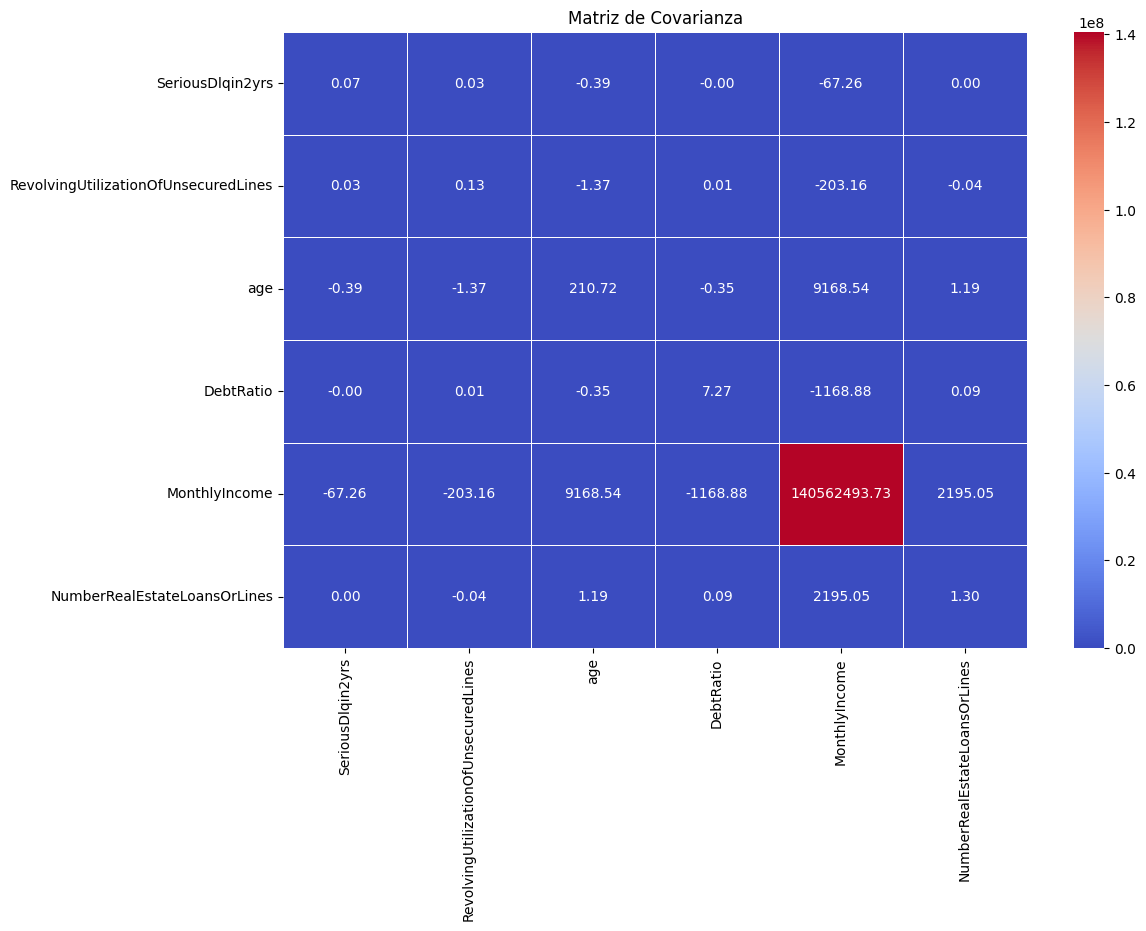

In [9]:
# 1Filtrar solo las columnas numéricas
df_numeric = df_clean.select_dtypes(include=["int64", "float64"])

# MATRIZ DE CORRELACIÓN - ANÁLISIS VISUAL
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()

# 3FILTRADO POR VALORES DE CORRELACIÓN
# Umbral de correlación (ajustable)
correlation_threshold = 0.75

# Matriz de correlación absoluta
corr_matrix = df_numeric.corr().abs()

# Seleccionar variables con correlación alta
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > correlation_threshold:
            high_corr_features.add(corr_matrix.columns[i])

print("\nVariables eliminadas por alta correlación:")
print(high_corr_features)

# Filtrar el dataframe eliminando variables altamente correlacionadas
df_filtered = df_numeric.drop(columns=high_corr_features)

# MATRIZ DE COVARIANZA
# Matriz de covarianza
cov_matrix = df_filtered.cov()

# Mostrar la matriz de covarianza
plt.figure(figsize=(12, 8))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Covarianza")
plt.show()


In [10]:
print(df_clean.dtypes)


SeriousDlqin2yrs                           int64
RevolvingUtilizationOfUnsecuredLines     float64
age                                        int64
NumberOfTime30-59DaysPastDueNotWorse    category
DebtRatio                                float64
MonthlyIncome                            float64
NumberOfOpenCreditLinesAndLoans         category
NumberOfTimes90DaysLate                 category
NumberRealEstateLoansOrLines               int64
NumberOfTime60-89DaysPastDueNotWorse    category
NumberOfDependents                      category
dtype: object


In [11]:
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np

# Separar variables numéricas (excluyendo la variable objetivo)
num_features = df_clean.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_features.remove("SeriousDlqin2yrs")  # Excluir la variable objetivo

X_num = df_clean[num_features]  # Features numéricas
y = df_clean["SeriousDlqin2yrs"]  # Variable objetivo

# Aplicar SelectKBest con ANOVA
selector = SelectKBest(score_func=f_classif, k=6)  # Seleccionamos las 6 mejores
X_new = selector.fit_transform(X_num, y)

# Obtener los nombres de las mejores variables
selected_num_features = np.array(num_features)[selector.get_support()]
print(" Mejores Features Numéricas:", selected_num_features)


 Mejores Features Numéricas: ['RevolvingUtilizationOfUnsecuredLines' 'age' 'DebtRatio' 'MonthlyIncome'
 'NumberRealEstateLoansOrLines']


c:\Users\migue\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:783: UserWarning: k=6 is greater than n_features=5. All the features will be returned.
  warnings.warn(


In [12]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Filtrar solo las columnas categóricas
cat_features = df_clean.select_dtypes(include=["category"]).columns.tolist()

# Convertir categorías en números con LabelEncoder
X_cat_encoded = df_clean[cat_features].apply(lambda col: LabelEncoder().fit_transform(col))

# Aplicar Mutual Information
mi_scores = mutual_info_classif(X_cat_encoded, y)

# Seleccionar las 6 mejores
selected_cat_features = np.array(cat_features)[np.argsort(mi_scores)[-6:]]
print("Mejores Features Categóricas:", selected_cat_features)


Mejores Features Categóricas: ['NumberOfDependents' 'NumberOfOpenCreditLinesAndLoans'
 'NumberOfTime60-89DaysPastDueNotWorse'
 'NumberOfTime30-59DaysPastDueNotWorse' 'NumberOfTimes90DaysLate']


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Definir las features seleccionadas anteriormente (numéricas + categóricas)
selected_features = [
    'RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome',
    'NumberRealEstateLoansOrLines', 'NumberOfOpenCreditLinesAndLoans',
    'NumberOfDependents', 'NumberOfTime60-89DaysPastDueNotWorse',
    'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate'
]

# Convertir las features categóricas a numéricas con LabelEncoder
from sklearn.preprocessing import LabelEncoder
df_encoded = df_clean[selected_features].copy()
for col in df_encoded.select_dtypes(include=['category']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Definir las variables de entrada (X) y la variable objetivo (y)
X = df_encoded
y = df_clean["SeriousDlqin2yrs"]

# Entrenar un modelo de RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Selección de features con SelectFromModel
selector = SelectFromModel(rf, threshold="median", prefit=True)
selected_features_model = X.columns[selector.get_support()]

print(" Mejores Features Seleccionadas por el Modelo:", selected_features_model.tolist())


 Mejores Features Seleccionadas por el Modelo: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate']


In [14]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Definir la cantidad de features a seleccionar (máximo 6)
num_features_to_select = 6

# Convertir las features categóricas a numéricas con LabelEncoder
from sklearn.preprocessing import LabelEncoder
df_encoded = df_clean.copy()
for col in df_encoded.select_dtypes(include=['category']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Definir las variables de entrada (X) y la variable objetivo (y)
X = df_encoded.drop(columns=["SeriousDlqin2yrs"])  # Excluir la variable objetivo
y = df_clean["SeriousDlqin2yrs"]

# Entrenar un modelo base
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Aplicar RFE
selector = RFE(estimator=rf, n_features_to_select=num_features_to_select)
selector.fit(X, y)

# Obtener las mejores features
selected_rfe_features = X.columns[selector.support_]
print(" Mejores Features Seleccionadas por RFE:", selected_rfe_features.tolist())


 Mejores Features Seleccionadas por RFE: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']


In [17]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, make_scorer

# Definir el modelo base
rf = RandomForestClassifier(n_estimators=10, random_state=42)

# Definir el número de features a seleccionar (máximo 6)
num_features_to_select = 6

# Convertir las features categóricas a numéricas con LabelEncoder
from sklearn.preprocessing import LabelEncoder
df_encoded = df_clean.copy()
for col in df_encoded.select_dtypes(include=['category']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Definir las variables de entrada (X) y la variable objetivo (y)
X = df_encoded.drop(columns=["SeriousDlqin2yrs"])  # Excluir la variable objetivo
y = df_clean["SeriousDlqin2yrs"]

# Aplicar SFS con un modelo base
sfs = SFS(rf, 
          k_features=num_features_to_select, 
          forward=True,  # Selección hacia adelante
          floating=False,  # No permite eliminar una vez seleccionada
          scoring=make_scorer(recall_score),  # Evaluar con Recall
          cv=5)  # Validación cruzada de 5 folds

sfs.fit(X, y)

# Obtener las mejores features
selected_sfs_features = list(sfs.k_feature_names_)
print(" Mejores Features Seleccionadas por SFS:", selected_sfs_features)


 Mejores Features Seleccionadas por SFS: ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


In [18]:
from collections import Counter

# Listas de features seleccionadas por cada método
features_selectfrommodel = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate']
features_rfe = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']
features_sfs = ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

# Unir todas las features en una sola lista
all_features = features_selectfrommodel + features_rfe + features_sfs

# Contar la frecuencia de cada feature
feature_counts = Counter(all_features)

# Ordenar las features por cantidad de apariciones en los métodos anteriores
sorted_features = sorted(feature_counts.items(), key=lambda x: x[1], reverse=True)

# Seleccionar las 6 features más votadas
final_selected_features = [feature[0] for feature in sorted_features[:6]]

# Mostrar los resultados
print(" Features más votadas (Hard Voting):", final_selected_features)


 Features más votadas (Hard Voting): ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTimes90DaysLate', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfTime60-89DaysPastDueNotWorse']


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# Reducir el dataset al 30% para pruebas rápidas
df_encoded = df_clean.sample(frac=0.3, random_state=42).copy()

# Convertir variables categóricas en números
for col in df_encoded.select_dtypes(include=['category']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Definir las listas de features
feature_sets = {
    "SelectFromModel": ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate'],
    "RFE": ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'],
    "SFS": ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
    "HardVoting": ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTimes90DaysLate', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfTime60-89DaysPastDueNotWorse'],
    "Top5": ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTimes90DaysLate', 'age', 'DebtRatio', 'MonthlyIncome'],
    "Custom": ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'age', 'DebtRatio', 'MonthlyIncome']
}

# Definir modelos
models = {
    "Random Forest": RandomForestClassifier(n_estimators=10, random_state=42),  
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),  
    "Decision Tree": DecisionTreeClassifier(random_state=42)  
}

# Evaluar cada combinación de modelo y features con `cv=2`
results = {}

for model_name, model in models.items():
    results[model_name] = {}
    for feature_set_name, features in feature_sets.items():
        X_selected = df_encoded[features]  # Selección de variables
        y = df_encoded["SeriousDlqin2yrs"]  # Variable objetivo
        
        scores = cross_val_score(model, X_selected, y, cv=2, scoring="recall") 
        
        # Guardar el resultado promedio
        results[model_name][feature_set_name] = np.mean(scores)

# Mostrar 
df_results = pd.DataFrame(results)
print("\nResultados de la Validación Cruzada (Recall Promedio):")
print(df_results)



Resultados de la Validación Cruzada (Recall Promedio):
                 Random Forest  Logistic Regression  Decision Tree
SelectFromModel       0.139460             0.011937       0.223111
RFE                   0.135397             0.027810       0.262921
SFS                   0.191143             0.047746       0.243016
HardVoting            0.163429             0.027810       0.254921
Top5                  0.143365             0.011937       0.235111
Custom                0.135587             0.011937       0.239111


### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.